## Introduction

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, mean_absolute_error, accuracy_score
import math


# naive bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#k-neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#mlp classifier
from sklearn.neural_network import MLPClassifier

#svc
from sklearn.svm import SVC

#notebook cleanup
import warnings
warnings.filterwarnings("ignore")

## Importing and Data Preparation

In [127]:
#importing relevant datasets
hap16 = pd.read_csv("Data/2016.csv", index_col=0)
hap15 = pd.read_csv("Data/2015.csv", index_col=0)
suicide = pd.read_csv("Data/data.csv", header=1, index_col=0)

While the World Happiness dataset is in good form, we would like to change up the Suicide dataset so it can be in a similar format so we can merge the two datasets. 

Currently the Suicide dataset is in the format as follows:
* Country --> Both Sexes --> data
* Country --> Male --> data
* Country --> Female --> data

However, we would like to seperate the datasets so that each country has one row so it will make it easier to merge datasets. In addition, we can seperate the data further by creating a dataset for both 2016 and 2015 and merge them with their respective world happiness data. All the other rows can be dropped as we do not have world happiness data from these years. Analysis can then be performed to compare 2016 and 2015 to see if there was any significant changes between these years. 

In [128]:
#seperating dataset by gender
both = suicide[suicide.Sex == 'Both sexes']
male = suicide[suicide.Sex == 'Male']
female = suicide[suicide.Sex == 'Female']

#dropping irrelevant columns
b16 = both.drop(['Sex', '2015', '2010', '2005', '2000'], axis=1)
m16 = male.drop(['Sex', '2015', '2010', '2005', '2000'], axis=1)
f16 = female.drop(['Sex', '2015', '2010', '2005', '2000'], axis=1)
b15 = both.drop(['Sex', '2016', '2010', '2005', '2000'], axis=1)
m15 = male.drop(['Sex', '2016', '2010', '2005', '2000'], axis=1)
f15 = female.drop(['Sex', '2016', '2010', '2005', '2000'], axis=1)

Now we can merge the 2016 and 2015 datasets with their respective world happiness datasets and rename the suicide rate column appropriately for easier use in the analysis. 

In [129]:
#joining relevant data
df16 = hap16.join(b16, how='inner')
df15 = hap15.join(b15, how='inner')

#renaming suicide rate column
df16 = df16.rename(columns={'2016':'Suicide Rate'})
df15 = df15.rename(columns={'2015':'Suicide Rate'})

df16.head()

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Suicide Rate
Country,,,,,,,,,,,,,
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,12.8
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,17.2
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,14.0
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,12.2
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,15.9


In [130]:
df16.shape

(133, 13)

We now have two complete dataset of 133 countries with the world happiness values as well as the suicide rates from both 2016 and 2015. 

## Data Exploration

We will now compare the distributions of some key variables in both datasets to see if they have changed between 2015 and 2016. 

### Univariate Analysis

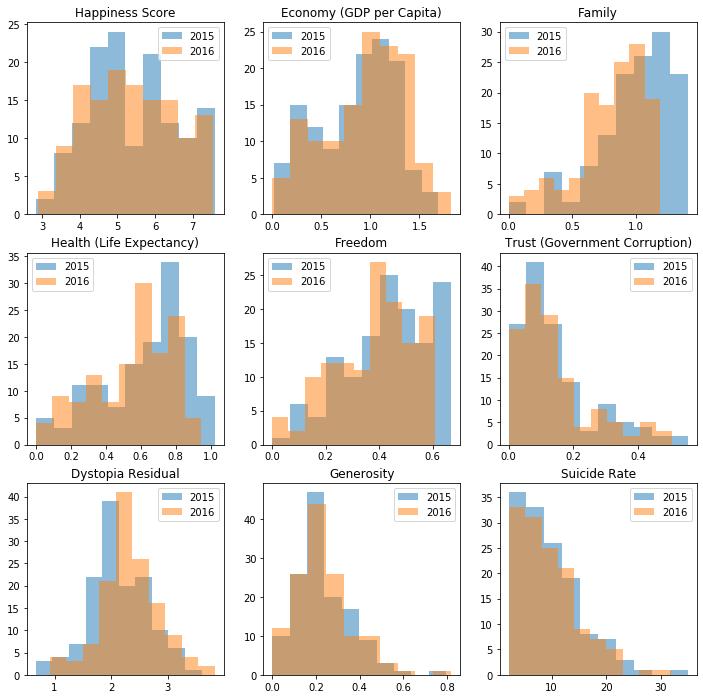

In [131]:
#creating list of key variables
key = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
       'Trust (Government Corruption)', 'Dystopia Residual', 'Generosity', 'Suicide Rate']

#creating matrix of histograms of key variables
plt.figure(figsize=(12, 12))
for i in range(0, len(key)):
    plt.subplot(3, 3, i+1)
    plt.hist(df15[key[i]], alpha=0.5, label='2015')
    plt.hist(df16[key[i]], alpha=0.5, label='2016')
    plt.legend()
    plt.title(key[i])

From these histograms we have learnt the following:
* Happiness Score has a normal distribution with an average of 5 for both years. 
* Economy, Family, Health and Freedom are left-skewed with the majority of countries having high values. 2015 seems to have higher values more frequently, meaning that these values have all decreased, which isn't a good sign. 
* Trust in Government is right-skewed meaning that the majority of countries do not have trust in their governments and is roughly the same over the two years. 
* Dystopia is normally distributed with an average close to 2 and has slightly increased in 2016. 
* Suicide rates seem roughly the same in 2015 and 2016. 

Lets take a closer look at the suicide rates by region in each year to see which regions in the world are the most vulnerable.

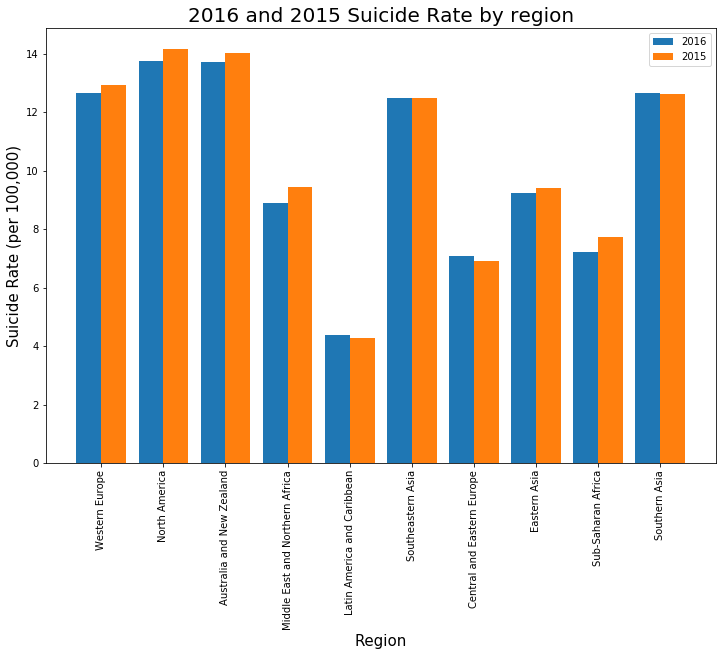

In [132]:
#creating dimension of clustered bar chart
fig, ax = plt.subplots(figsize=(12, 8))
x=np.arange(len(df16.Region.unique()))
bar_width = 0.4

#adding data to bars
b1 = ax.bar(x, df16.groupby(['Region'])['Suicide Rate'].mean(), width=bar_width, label='2016')
b2 = ax.bar(x+bar_width, df15.groupby(['Region'])['Suicide Rate'].mean(), width=bar_width, label='2015')

#adding labels
ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(df16.Region.unique(), rotation=90)
ax.set_title('2016 and 2015 Suicide Rate by region', size=20)
ax.set_xlabel('Region', size=15)
ax.set_ylabel('Suicide Rate (per 100,000)', size=15)
ax.legend()

Surprisingly, the regions which are the most vulnerable are the major regions such as Western Europe, North America and Australia/New Zealand. The lowest rates are in Latin America and Caribbean as they stand out from the rest of the data for having such low rates.

We will perform some bivariate analysis on Happiness vs Suicide Rate to see if there is a correlation and figure out why certain regions have higher rates than others. We will use the Happiness Score since all other key variables in the world happiness dataset contain values which represent their total contribution to the happiness score of a certain country. Thus, when we look at Happiness vs Suicide Rate, we are looking at all of the different key factors that go into the happiness score and seeing if they correlate with suicide rates. 

### Bivariate Analysis

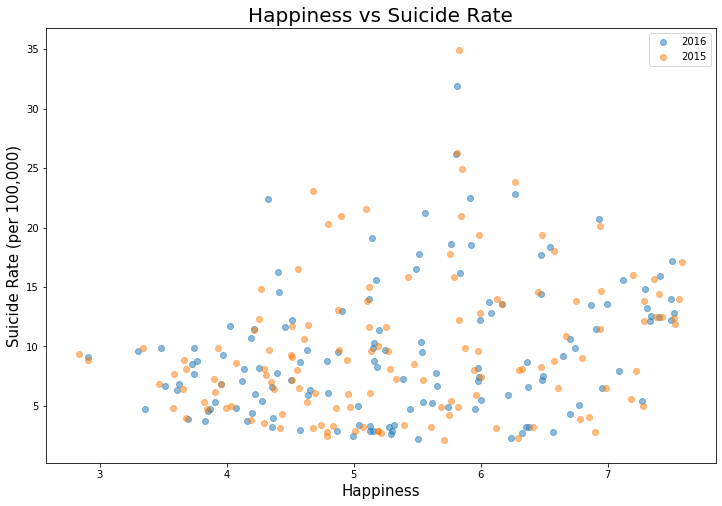

In [133]:
#creating scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df16['Happiness Score'], df16['Suicide Rate'], alpha=0.5, label='2016')
plt.scatter(df15['Happiness Score'], df15['Suicide Rate'], alpha=0.5, label='2015')

#labels
plt.title('Happiness vs Suicide Rate', size=20)
plt.xlabel('Happiness', size=15)
plt.ylabel('Suicide Rate (per 100,000)', size=15)
plt.legend()

We can see that there doesn't seem to be a high correlation between Happiness and Suicide Rates, and there doesn't seem to be a noticeable difference between 2016 and 2015. 

However, there does seem to be two horizontal 'layers' of data points. The first layer being from **0-10** in suicide rate where the points are scattered along **3-7** happiness score evenly. Then there is a second layer ranging from **10 upwards** in suicide rate while only ranging from **4-7** in happiness score. Thus, there is a 'gap' in suicide rates above 10 and happiness score below 4. This means that countries with the lowest happiness have lower suicide rates and once the happiness score reaches 4, they have a chance of increasing. 

## Models for Making Predictions on Suicide Rate

In [134]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score
import math
from matplotlib import pyplot as plt

Here we split the data into a training set and testing set. We are using the happiness data to make predictions about the suicide rate.

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df16.drop(columns=['Suicide Rate', 'Region', 'Happiness Rank']), df16['Suicide Rate'], test_size=0.3, random_state=142)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(93, 10) (40, 10) (93,) (40,)


### Linear Regression

The first model explored is Linear Regression. As this is a fairly simple model we were not expecting good results as the data had no obvious correlations and therefore a linear model would not be able to make any accurate predictions.

In [136]:
# Fitting the Model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Prediciting suicide rate given Happiness data
y_pred = model.predict(X_test)

# Scoring the prediction
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("R Squared:", r2)
print("MAE:", mae)

MSE: 29.27565140329485
R Squared: -0.07195221280368003
MAE: 4.438833862034164


Text(0.5, 1.0, 'Happiness Score Vs Suicide Rates: Decision Tree Predictions')

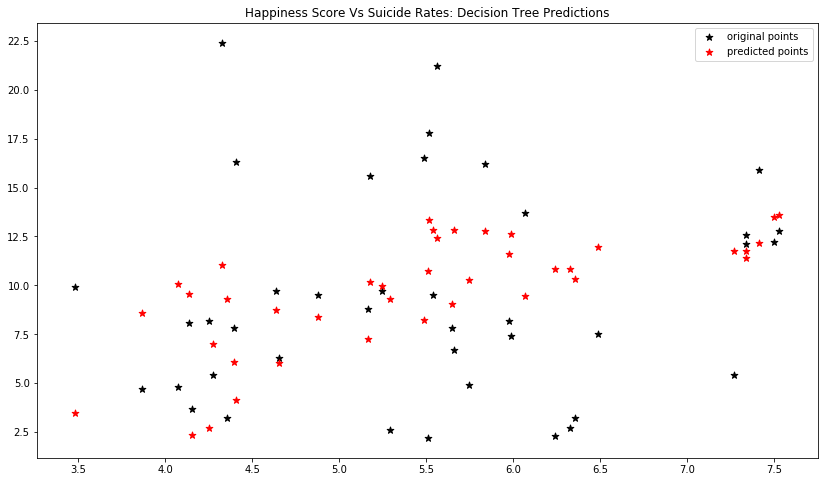

In [137]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Happiness Score'], y_test, marker='*', c='k', s=50, label='original points')
plt.scatter(X_test['Happiness Score'], y_pred, marker='*', c='r', s=50, label='predicted points')
plt.legend()
plt.title('Happiness Score Vs Suicide Rates: Decision Tree Predictions')

As shown in the results and graph above, linear regression performed poorly. On average the mean squared error was 29.75 which is significantly large given the mean rate of suicide. The negative R squared value tells us that the model fits worse than horizontal line. 

In [138]:
from sklearn.feature_selection import RFE

# Selecting the best features
estimator = linear_model.LinearRegression()
selector = RFE(estimator, 6, step=1)
selector.fit(X_train, y_train)
y_predict = selector.predict(X_test)

colNames = X_train.columns
print("Important features: ", colNames[selector.support_])

Important features:  Index(['Happiness Score', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')


The RFE estimator tells us that using a linear model the most important features were Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Generosity' when looking at the top 6 features.

In [139]:
X_scale_train = pd.DataFrame()
X_scale_test = pd.DataFrame()

rmse_set = []
r2_set = []
mae_set = []

for col in X_train:
    model = linear_model.LinearRegression()
    
    X_scale_train[col] = X_train[col]
    X_scale_test[col] = X_test[col]
    
    model.fit(X_scale_train, y_train)

    y_pred_scale = model.predict(X_scale_test)
    rmse_set.append(math.sqrt(mean_squared_error(y_test, y_pred_scale)))
    r2_set.append(r2_score(y_test, y_pred_scale))
    mae_set.append(mean_absolute_error(y_test, y_pred_scale))

Text(0, 0.5, 'RMSE')

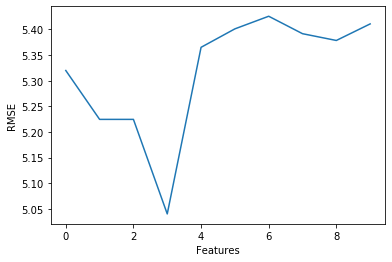

In [140]:
plt.plot(rmse_set)
plt.xlabel("Features")
plt.ylabel("RMSE")

The graph above shows the performance of linear regression as more features are added. As shown the best performance is reached at 3 features.

### MLP Regressor 

The next model used was the Multi-layer Perceptron Regressor. We had hoped that this model, which is more complicated than linear regression, would be able to perform better on the data. 

In [141]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=0, max_iter=600)
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=600, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [142]:
y_cap = mlp.predict(X_test)
mlp_mse = mean_squared_error(y_test, y_cap)
mlp_r2 = r2_score(y_test, y_cap)

print('MSE: ', mlp_mse, 'r2: ', mlp_r2)

MSE:  28.643511204096825 r2:  -0.04880587607498743


Unfortunatly its performance was only slighly better than linear regression.

Text(0.5, 1.0, 'Happiness Score Vs Suicide Rates: MLP Regressor Predictions')

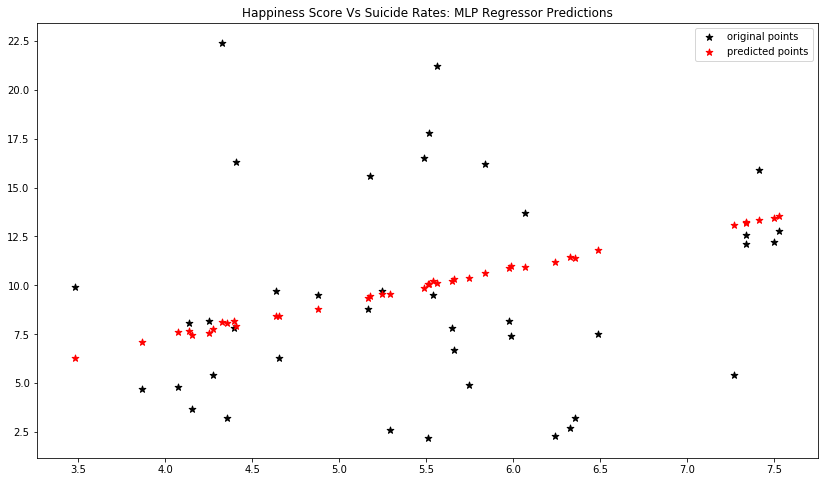

In [143]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Happiness Score'], y_test, marker='*', c='k', s=50, label='original points')
plt.scatter(X_test['Happiness Score'], y_cap, marker='*', c='r', s=50, label='predicted points')
plt.legend()
plt.title('Happiness Score Vs Suicide Rates: MLP Regressor Predictions')

### Decision Trees

In [144]:
from sklearn.tree import DecisionTreeRegressor

# Initialising and fitting the regressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=8)
regressor.fit(X_train, y_train)
y_cap_tree = regressor.predict(X_test)

In [145]:
tree_mse = mean_squared_error(y_test, y_cap_tree)
tree_r2 = r2_score(y_test, y_cap_tree)

print('MSE: ', tree_mse, 'r2: ', tree_r2)

MSE:  30.33988920734714 r2:  -0.11092016105827596


The Decision Tree Algorithm performed worst, with an MSE of 30.34. 

Text(0.5, 1.0, 'Happiness Score Vs Suicide Rates: Decision Tree Predictions')

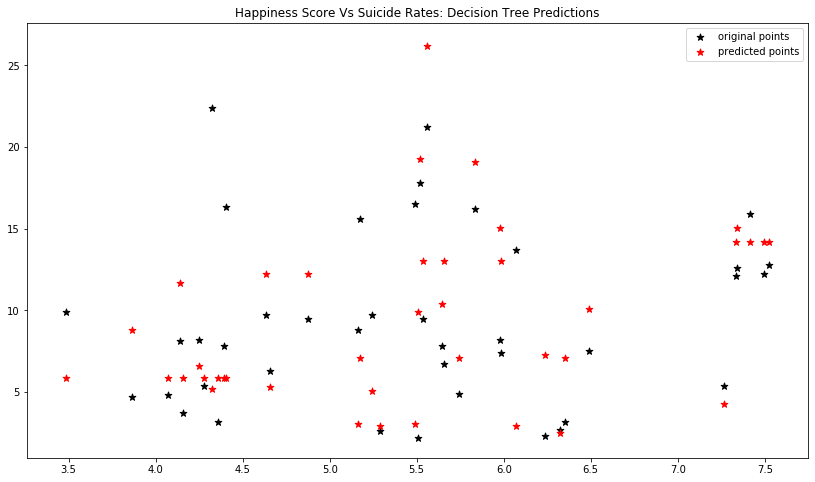

In [146]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Happiness Score'], y_test, marker='*', c='k', s=50, label='original points')
plt.scatter(X_test['Happiness Score'], y_cap_tree, marker='*', c='r', s=50, label='predicted points')
plt.legend()
plt.title('Happiness Score Vs Suicide Rates: Decision Tree Predictions')

In [147]:
mse_data = []
mse_data.append(mse)
mse_data.append(mlp_mse)
mse_data.append(tree_mse)

r2_data = []
r2_data.append(r2)
r2_data.append(mlp_r2)
r2_data.append(tree_r2)

<function matplotlib.pyplot.show(*args, **kw)>

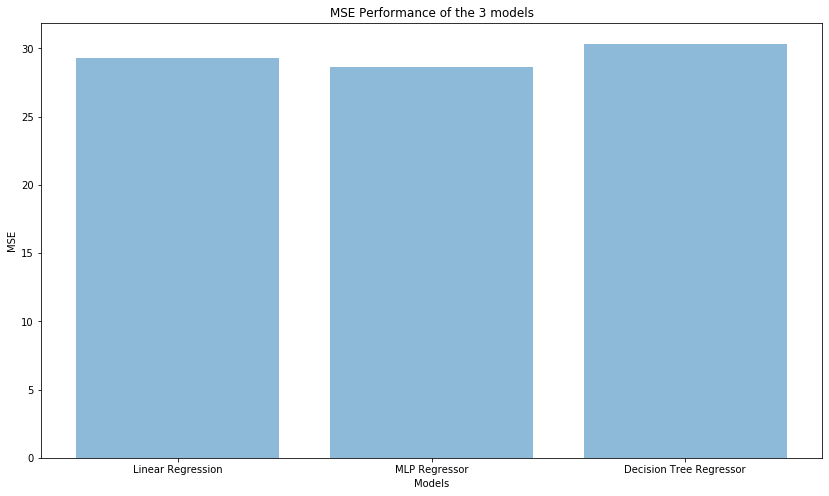

In [148]:
labels = ['Linear Regression', 'MLP Regressor', 'Decision Tree Regressor']

plt.figure(figsize=(14,8))
plt.bar(np.arange(len(mse_data)), mse_data, align='center', alpha=0.5)
plt.xticks(np.arange(len(mse_data)), labels)
plt.ylabel('MSE')
plt.xlabel('Models')
plt.title('MSE Performance of the 3 models')
plt.show

The performance of all 3 models is very similar.

<function matplotlib.pyplot.show(*args, **kw)>

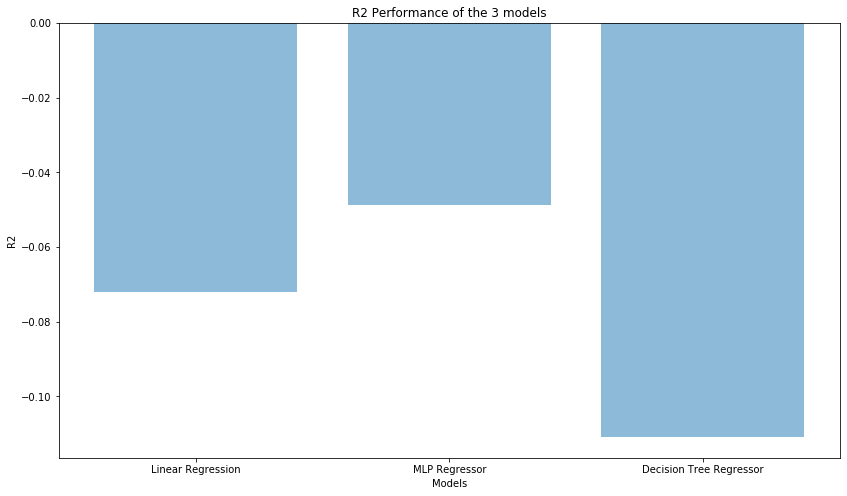

In [149]:
plt.figure(figsize=(14,8))
plt.bar(np.arange(len(r2_data)), r2_data, align='center', alpha=0.5)
plt.xticks(np.arange(len(r2_data)), labels)
plt.ylabel('R2')
plt.xlabel('Models')
plt.title('R2 Performance of the 3 models')
plt.show

All 3 models have a negative R squared. This indicates that a horizontal line is a better predictor on the data then the models. From the results we can conclude that there is no correlation between a countries happiness score and its suicide rate. 

In [150]:
#define linear regression model
reg = LinearRegression()

#splitting data
data = df16.drop(['Region', 'Happiness Rank', 'Lower Confidence Interval',
                 'Upper Confidence Interval', 'Suicide Rate'], axis=1)
target = df16['Suicide Rate']
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

#fitting model
reg.fit(X_train, y_train)

print ("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [ 706.98170772 -707.04729841 -699.58386046 -702.8449012  -707.77393169
 -708.23033815 -711.13305588 -707.58197572] + 4.384762992115498


In [151]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(99, 8) (99,) (34, 8) (34,)


In [152]:
#predicting model
predicted = reg.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R-Squared:", r2)

MSE: 19.41893528205516
R-Squared: 0.09643197521918667


## Model for making predictions on Region

Since the r^2 scores aren't so good in the regression model to predict suicide rates based on happiness, we will move to a classification problem to see if we can predict which region a country is in based on their happiness stats in 2016. We will start by creating several different models and compare their train and test accuracy scores to see which is the best model to use in this analysis. 

In [153]:
data = df16.drop(['Region', 'Happiness Rank', 'Lower Confidence Interval',
                 'Upper Confidence Interval'], axis=1)
target = df16['Region']
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [154]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)
print("Accuracy Score on train set:", log.score(X_train, y_train))
print("Accuracy Score on test set:", log.score(X_test, y_test))

Accuracy Score on train set: 0.6161616161616161
Accuracy Score on test set: 0.6764705882352942


In [155]:
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)

print("Accuracy Score on train set:", knc.score(X_train, y_train))
print("Accuracy Score on test set:", knc.score(X_test, y_test))

Accuracy Score on train set: 1.0
Accuracy Score on test set: 0.47058823529411764


In [156]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("Accuracy Score on train set:", gnb.score(X_train, y_train))
print("Accuracy Score on test set:", gnb.score(X_test, y_test))

Accuracy Score on train set: 0.7474747474747475
Accuracy Score on test set: 0.7058823529411765


In [157]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
print("Accuracy Score on train set:", mnb.score(X_train, y_train))
print("Accuracy Score on test set:", mnb.score(X_test, y_test))

Accuracy Score on train set: 0.42424242424242425
Accuracy Score on test set: 0.38235294117647056


In [158]:
dtc = DecisionTreeClassifier(random_state=142)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("Accuracy Score on train set:", dtc.score(X_train, y_train))
print("Accuracy Score on test set:", dtc.score(X_test, y_test))

Accuracy Score on train set: 1.0
Accuracy Score on test set: 0.5882352941176471


In [159]:
mlp = MLPClassifier(random_state=142, learning_rate_init=0.01, max_iter=1000)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print("Accuracy Score on train set:", mlp.score(X_train, y_train))
print("Accuracy Score on test set:", mlp.score(X_test, y_test))

Accuracy Score on train set: 1.0
Accuracy Score on test set: 0.7058823529411765


In [160]:
svc = SVC(gamma='auto', random_state=142)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print("Accuracy Score on train set:", svc.score(X_train, y_train))
print("Accuracy Score on test set:", svc.score(X_test, y_test))

Accuracy Score on train set: 0.6161616161616161
Accuracy Score on test set: 0.4411764705882353


In [161]:
test_accuracy_scores = [log.score(X_test, y_test), knc.score(X_test, y_test), gnb.score(X_test, y_test),
                        mnb.score(X_test, y_test), dtc.score(X_test, y_test), mlp.score(X_test, y_test),
                        svc.score(X_test, y_test)]
train_accuracy_scores = [log.score(X_train, y_train), knc.score(X_train, y_train), gnb.score(X_train, y_train),
                       mnb.score(X_train, y_train), dtc.score(X_train, y_train), mlp.score(X_train, y_train),
                       svc.score(X_train, y_train)]
labels = ['Logistic Regression', 'K-Neighbors Classifier', 'Gaussian Naive Bayes', 'Multinomial Naive Bayes',
         'Decision Tree Classifier', 'MLP Classifier', 'SVC']

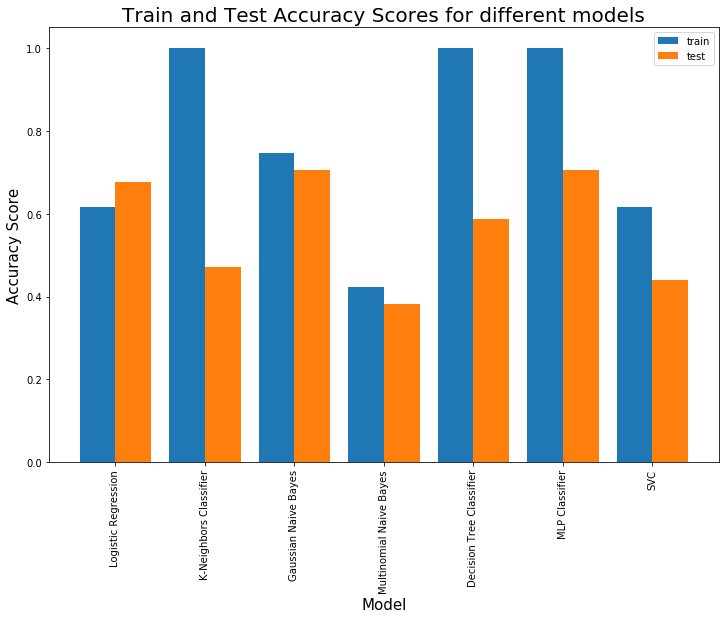

In [162]:
#creating dimension of clustered bar chart
fig, ax = plt.subplots(figsize=(12, 8))
x=np.arange(len(train_accuracy_scores))
bar_width = 0.4

#adding data to bars
b1 = ax.bar(x, train_accuracy_scores, width=bar_width, label='train')
b2 = ax.bar(x+bar_width, test_accuracy_scores, width=bar_width, label='test')

#adding labels
ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Train and Test Accuracy Scores for different models', size=20)
ax.set_xlabel('Model', size=15)
ax.set_ylabel('Accuracy Score', size=15)
ax.legend()

We can see that there are 3 models with a train accuracy score of 1.0 but their test score is much less. This means that this model is memorising the training data too much and the model is overfitting so it does not adjust to the test data very well. Based on this, we want to choose the model with a high train and test accuracy score. Therefore the Gaussian Naive Bayes model is the most appropriate model in this classification problem as it has a train accuracy score of **0.75** and a test accuracy score of **0.71**, which are both fairly high, and close to each other so the model is not overfitting too much. 

## Conclusion